# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.70.140.45',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

sql = """
SELECT MIN(hire_date), MAX(hire_date) 
FROM employees;
"""
cursor.execute(sql)
cursor.fetchall()


[(datetime.date(1985, 1, 1), datetime.date(2000, 1, 28))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП. 

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [5]:
import pandas as pd

In [6]:
sql = """
SELECT emp_no, salary, from_date, to_date 
FROM salaries
ORDER BY to_date DESC

"""

In [7]:
res = pd.read_sql(sql, con)

C:\Users\ALUNA\AppData\Local\Temp\ipykernel_2276\1608642757.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql(sql, con)


In [8]:
res

,emp_no,salary,from_date,to_date
0,499699,98027,2002-06-04,9999-01-01
1,499700,67644,2001-11-21,9999-01-01
2,499701,96322,2002-04-21,9999-01-01
3,499702,80773,2002-02-12,9999-01-01
4,499703,55531,2001-12-01,9999-01-01
...,...,...,...,...
2844042,287732,40000,1985-04-14,1985-04-17
2844043,34059,54776,1985-02-10,1985-03-23
2844044,434232,51991,1985-02-26,1985-03-20
2844045,474918,40000,1985-02-10,1985-03-11


In [9]:
field_names = [i[0] for i in cursor.description]

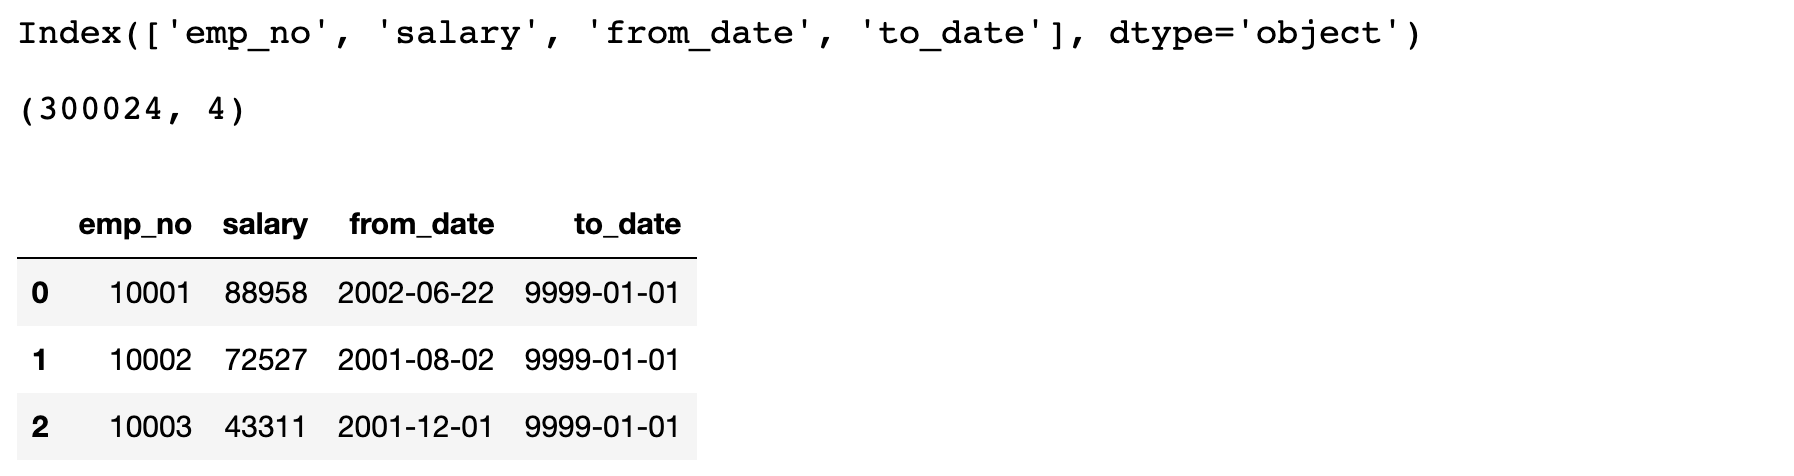

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [10]:
res.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [11]:
count_equal = (res['to_date'] == '9999-01-01').sum()
count_not_equal= (res['to_date'] != '9999-01-01').sum()

sql_total = """
SELECT COUNT(*) AS total_count
FROM salaries
WHERE to_date = '9999-01-01'
"""
total_result = pd.read_sql(sql_total, con)
total_count_equal = total_result['total_count'].iloc[0]
total_count_not_equal = len(res) - total_count_equal

print("values equal to '9999-01-01': ", total_count_equal)
print("values NOT equal to '9999-01-01': ", total_count_not_equal)


C:\Users\ALUNA\AppData\Local\Temp\ipykernel_2276\3494829699.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_result = pd.read_sql(sql_total, con)


values equal to '9999-01-01':  240124
values NOT equal to '9999-01-01':  2603923


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

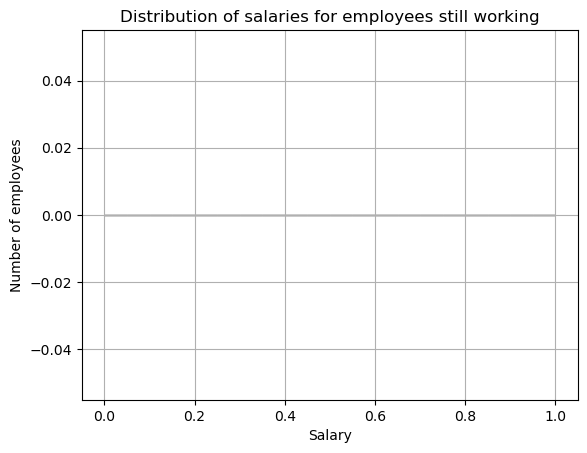

In [12]:
import matplotlib.pyplot as plt
employees_still_working = res[res['to_date'] == '9999-01-01']

plt.hist(employees_still_working['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.title('Distribution of salaries for employees still working')
plt.grid(True)
plt.show()



7.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [13]:
sql = """
SELECT EXTRACT(YEAR FROM hire_date) AS hire_year, COUNT(*) AS num_employees
FROM employees
GROUP BY EXTRACT(YEAR FROM hire_date)
ORDER BY hire_year
"""
df = pd.read_sql(sql, con)
df

C:\Users\ALUNA\AppData\Local\Temp\ipykernel_2276\2840342419.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


,hire_year,num_employees
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

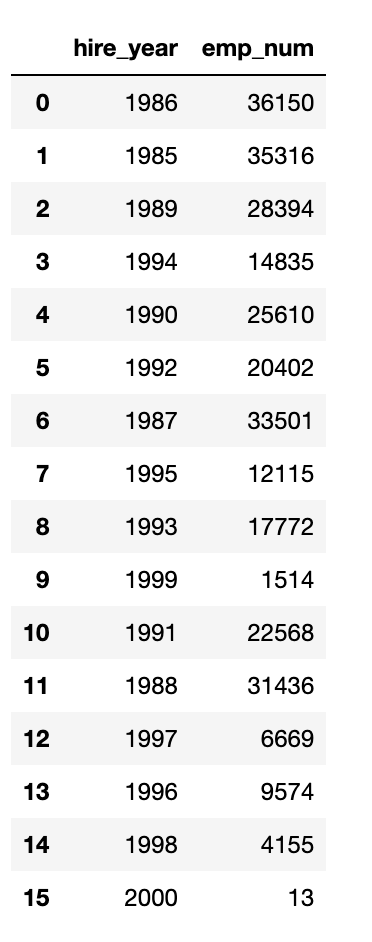

8.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

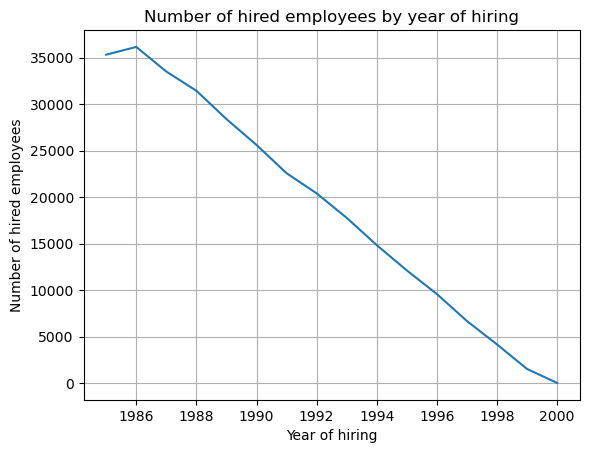

In [14]:
plt.plot(df['hire_year'], df['num_employees'])
plt.xlabel('Year of hiring')
plt.ylabel('Number of hired employees')
plt.title('Number of hired employees by year of hiring')
plt.grid(True)
plt.show()

Очікуваний результат:

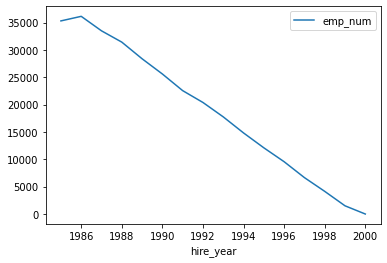

9.З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [15]:
sql = """SELECT 
    t.title,
    TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS duration,
    t.from_date,
    t.to_date
FROM 
    titles t
WHERE
    t.title = 'Engineer'
    AND t.to_date != '9999-01-01';
"""
df_years = pd.read_sql(sql, con)
df_years

C:\Users\ALUNA\AppData\Local\Temp\ipykernel_2276\3457564442.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql, con)


,title,duration,from_date,to_date
0,Engineer,9,1986-12-01,1995-12-01
1,Engineer,5,1990-02-18,1995-02-18
2,Engineer,8,1992-12-18,2000-12-18
3,Engineer,8,1987-04-03,1995-04-03
4,Engineer,5,1995-03-20,2001-03-19
...,...,...,...,...
84015,Engineer,9,1989-11-23,1998-11-23
84016,Engineer,5,1989-07-30,1994-07-30
84017,Engineer,0,1993-02-22,1993-10-27
84018,Engineer,6,1996-05-13,2002-05-13


Очікуваний результат:

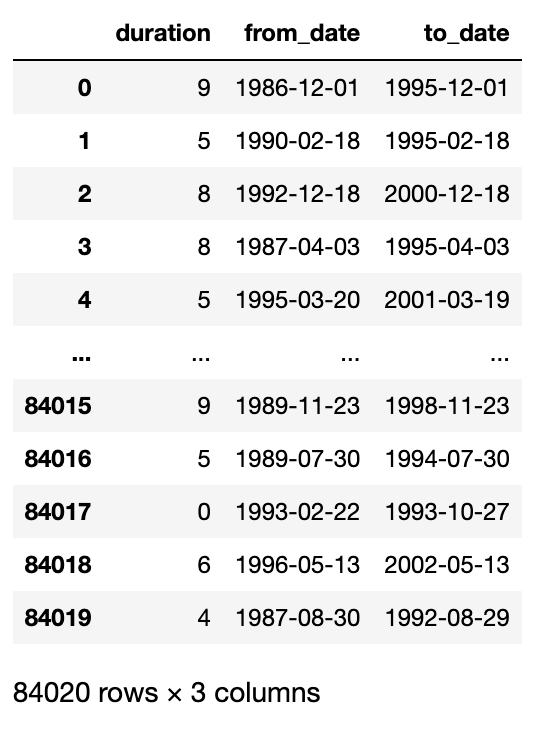

10.Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

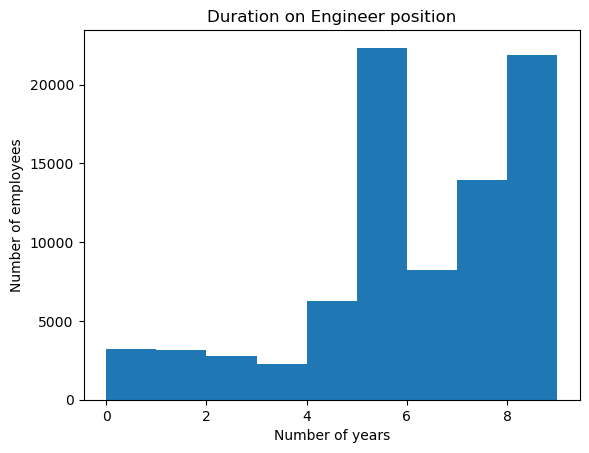

In [19]:
plt.hist(df_years['duration'], bins=range(0, df_years['duration'].max() + 1))

plt.xlabel('Number of years')
plt.ylabel('Number of employees')
plt.title('Duration on Engineer position')

plt.show()


Очікуваний результат:

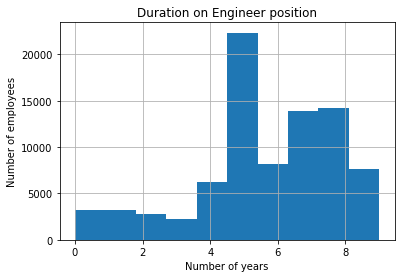

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [20]:
con.close()